## Data Cleaning

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function
print('Print ready to serve.')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

Print ready to serve.


In [2]:
# Load employee data from CSV
df = pd.read_csv('../data/employee_data.csv')

## 1. Drop Unwanted observations

In [3]:
# Drop duplicates
print(df.shape)
df.drop_duplicates()
print(df.shape)

(14249, 10)
(14249, 10)


In [4]:
df.columns

Index([u'avg_monthly_hrs', u'department', u'filed_complaint',
       u'last_evaluation', u'n_projects', u'recently_promoted', u'salary',
       u'satisfaction', u'status', u'tenure'],
      dtype='object')

In [5]:
df.dtypes[df.dtypes == 'object']

department    object
salary        object
status        object
dtype: object

In [6]:
# Unique classes of 'department'
#print(df.columns.values)
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [7]:
# Drop temporary workers
#df.drop()
#df = df.drop('temp', axis=1)
df = df[df.department != 'temp']
print(df.shape)

(14068, 10)


## 2. Fix Structural Errors

In [8]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())

# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[ nan   1.]
[ nan   1.]


In [9]:
# Missing filed_complaint values should be 0
df['filed_complaint'] = df.filed_complaint.fillna(0)

# Missing recently_promoted values should be 0
df['recently_promoted'] = df.recently_promoted.fillna(0)

In [10]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())
# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[ 0.  1.]
[ 0.  1.]


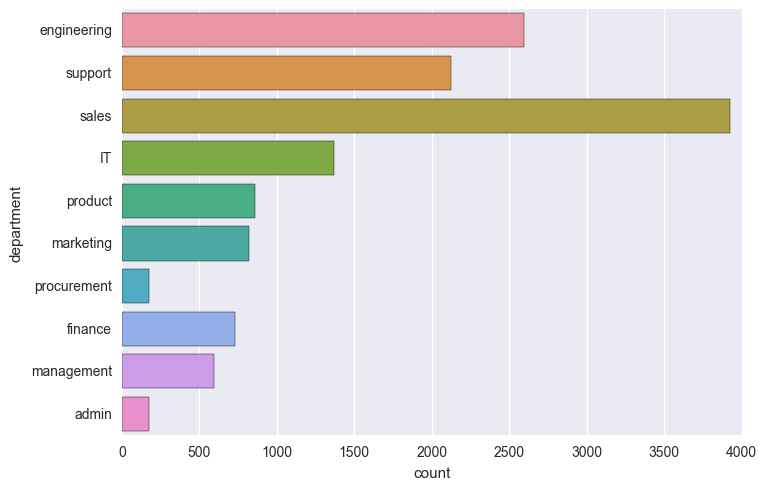

In [11]:
# 'information_technology' should be 'IT'
df.department.replace('information_technology', 'IT', inplace=True)

# Plot class distributions for 'department'
sns.countplot(y='department', data=df)

## 3. Handle Missing data

In [12]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [13]:
# Fill missing values in department with 'Missing'
df.department.fillna('Missing', inplace=True)

In [14]:
# Indicator variable for missing last_evaluation
#df.last_evaluation.unique()
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [15]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

In [16]:
# Display number of missing values by feature
print(df.isnull().sum())

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64


## 4. Engineer Features

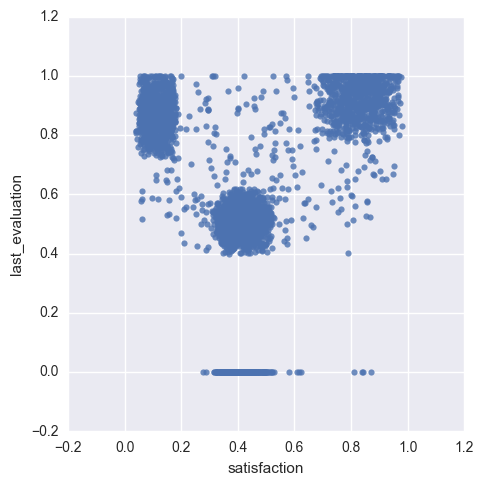

In [17]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status=='Left'], fit_reg=False)

In [18]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation < 0.6) & (df.last_evaluation_missing == 0)).astype(int)
df['unhappy'] = df.satisfaction < 0.2
df['overachiever'] = ((df.last_evaluation > 0.8) & 
                      (df.satisfaction > 0.7) ).astype(int)

In [19]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

In [20]:
# Convert status to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

In [21]:
# The proportion of observations who 'Left'
df.status.mean()

0.23933750355416547

In [22]:
# Create new dataframe with dummy features
#df.dtypes[df.dtypes=='object']
df = pd.get_dummies(data=df, columns=['department', 'salary'])
# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1.0,5.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,232,0.0,0.000000,3,0.0,0.834544,0.0,2.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,184,0.0,0.788830,3,0.0,0.834988,0.0,3.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,206,0.0,0.575688,4,0.0,0.424764,0.0,2.0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,249,0.0,0.845217,3,0.0,0.779043,0.0,3.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,140,0.0,0.589097,4,0.0,0.660020,0.0,4.0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,121,1.0,0.625399,3,0.0,0.835571,0.0,3.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,150,0.0,0.644586,4,0.0,0.796683,0.0,3.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,215,1.0,0.524114,3,0.0,0.715005,0.0,7.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,269,0.0,0.909364,5,0.0,0.994037,0.0,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
df.columns

Index([u'avg_monthly_hrs', u'filed_complaint', u'last_evaluation',
       u'n_projects', u'recently_promoted', u'satisfaction', u'status',
       u'tenure', u'last_evaluation_missing', u'underperformer', u'unhappy',
       u'overachiever', u'department_IT', u'department_Missing',
       u'department_admin', u'department_engineering', u'department_finance',
       u'department_management', u'department_marketing',
       u'department_procurement', u'department_product', u'department_sales',
       u'department_support', u'salary_high', u'salary_low', u'salary_medium'],
      dtype='object')

In [24]:
# Save analytical base table
df.to_csv('analytical_base_table.csv')